In [2]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [7]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

In [55]:
additional_metrics = ['acc']
loss_function = BinaryCrossentropy()
number_of_epochs = 7000
optimizer = Adam()
verbosity_mode = 0
layer_size = 10

In [56]:
model = Sequential()
model.add(Dense(layer_size,input_dim=4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [59]:
m=10

In [64]:
x_pos=iris.data[0:50]
x_neg=iris.data[50:150]
x_train = np.concatenate((x_pos, x_neg)).reshape(-1, 4)
y_train = np.concatenate((np.ones(50), np.zeros(100))).reshape(-1, 1).astype(int)

In [61]:
#new_data = []
#mean=np.mean(x_train)
#std = np.std(x_train)
#for x in x_train:
 #   new_data += [(x-mean)/std]
#x_train = np.array(new_data)

## Easier ways to this
## method 1
# x_train = (x - np.mean(x)) / np.std(x) # this happens because of numpy broadcasting. it is also faster.

## method 2
from sklearn.preprocessing import StandardScaler 
x_train = StandardScaler().fit_transform(x_train)

In [65]:
x_train.shape

(150, 4)

In [66]:
x_train

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
y_train.shape

(150, 1)

## Model training

In [67]:
batch_size = len(x_train)

In [68]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

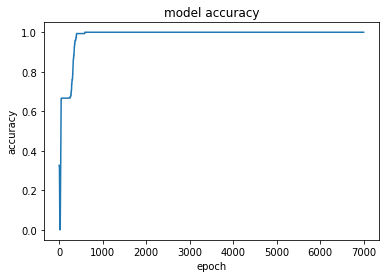

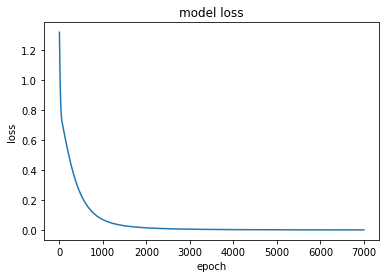

In [69]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

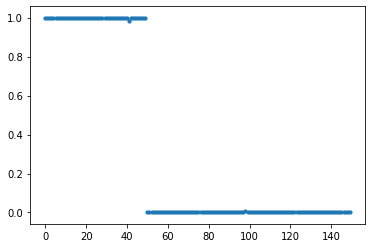

In [70]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [71]:
layer_size = 5
number_of_epochs = 500
model = Sequential()
model.add(Dense(layer_size,input_dim=4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


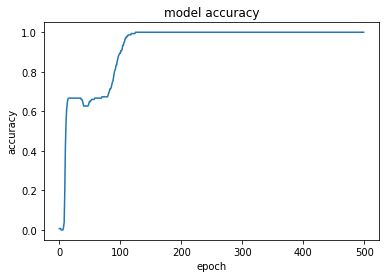

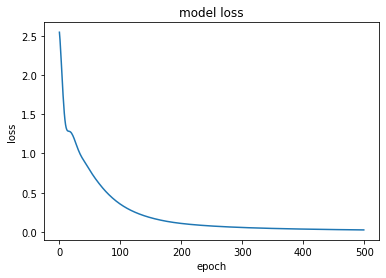

In [72]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=5
#epochs 500

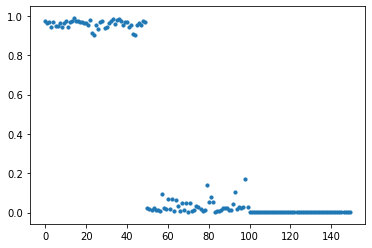

In [73]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [74]:
layer_size = 2
number_of_epochs = 200
model = Sequential()
model.add(Dense(layer_size,input_dim=4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


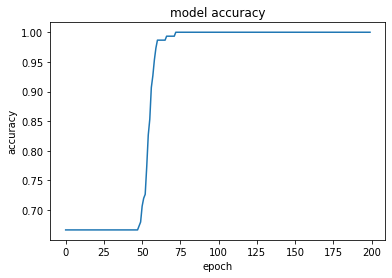

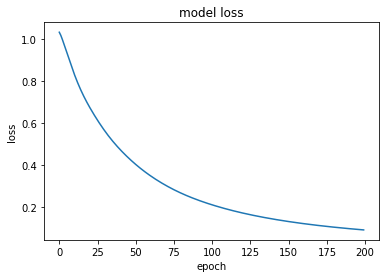

In [75]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=2

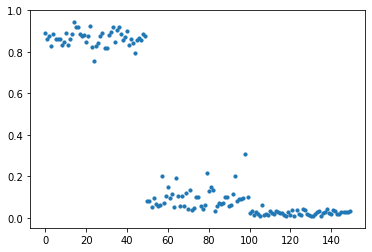

In [76]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [77]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict(x_train)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict(x)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)


#adds ratio r of an array of random integers of size n to bloom filter bf(input : bf,size,ratio; output: data array)
def addrandom(bf,n,r):
    data=np.empty(n,dtype=int)
    for i in range(0,n):
        data[i]=random.randint(0, 100000000)
    for j in range(0,int(n*r)):
        bf.add(data[j])
    return data

#(Input:bloom filter,number array,ratio of positives; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,nums,r):
    fp = 0
    pred = bf.model.predict(x_train)
    indexes = []
    for i in range(len(pred)):
        indexes += [math.floor(pred[i][0]*(bf.size-1))]
        if(bf.bit_array[indexes[i]]==1 and y_train[i]==0): 
            fp+=1
        if(bf.bit_array[indexes[i]]==0 and y_train[i]==1): 
            return -1
    return fp/(len(nums)-int(len(nums)*r))

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k

#(Input:size of bloom filter, number of hash functions, total numbers, ratio of numbers inserted; Output: fpr)
def find_fpr(m,model,n,r):
    bf=BloomFilter(model,m)
    data=addrandom(bf,n,r)
    return fpr(bf,data,r)

#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [78]:
bf=BloomFilter(m,model)

In [79]:
bf.add_init(x_train,y_train)

In [80]:
tp = 0
fp = 0
tn = 0
fn = 0
pred = bf.model.predict(x_train)
indexes = []
for i in range(len(pred)):
    indexes += [math.floor(pred[i][0]*(bf.size-1))]
    if(bf.bit_array[indexes[i]]==1 and y_train[i]==1): tp+=1
    if(bf.bit_array[indexes[i]]==1 and y_train[i]==0): fp+=1
    if(bf.bit_array[indexes[i]]==0 and y_train[i]==0): tn+=1
    if(bf.bit_array[indexes[i]]==0 and y_train[i]==1): fn+=1
print(tp)
print(fp)
print(tn)
print(fn)

## Easier way to do this
# from sklearn.metrics import confusion_matrix
# tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel() # ravel opens up the 2x2 matrix

50
0
100
0


In [81]:
from sklearn.metrics import confusion_matrix
pred = bf.predict(x_train)
tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel() # ravel opens up the 2x2 matrix
print(tn)
print(tp)
print(fp)
print(fn)

100
50
0
0


In [22]:
#tp = 0
#fp = 0
#tn = 0
#fn = 0
#for i in range(len(x_train)):
#    if(bf.lookup(x_train[i]) and y_train[i]==1): tp+=1
#    if(bf.lookup(x_train[i]) and y_train[i]==0): fp+=1
#    if((bf.lookup(x_train[i])==False) and y_train[i]==1): fn+=1
#    if((bf.lookup(x_train[i])==False) and y_train[i]==0): tn+=1

#print(tp)
#print(fp)
#print(tn)
#print(fn)

In [82]:
print(fpr_kraska_hash(bf,x_train,0.33))

0.0
